In [134]:
import random
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import numpy as np

In [62]:
d1 = random.randrange(1,7)
d2 = random.randrange(1,7)
d3 = random.randrange(1,7)
d4 = random.randrange(1,7)

dices = [d1,d2,d3,d4]
dices = sorted(dices)
dices.remove(dices[0])
soma = sum(dices)


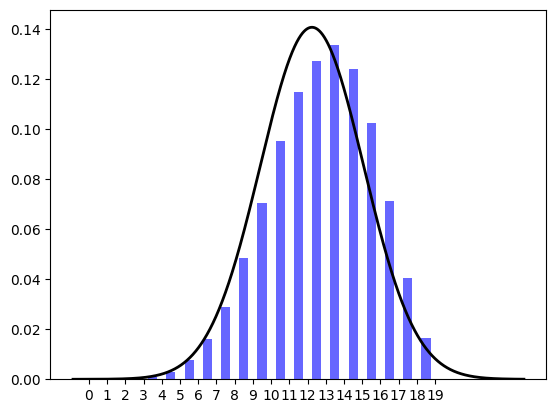

In [211]:
somas = []

for i in range(0,100000):
    
    d1 = random.randrange(1,7)
    d2 = random.randrange(1,7)
    d3 = random.randrange(1,7)
    d4 = random.randrange(1,7)

    dices = [d1,d2,d3,d4]
    dices = sorted(dices)
    dices.remove(dices[0])
    soma = sum(dices)
    
    somas.append(soma)
    
#plt.hist(somas, histtype='stepfilled')

mu, std = norm.fit(somas)

plt.hist(somas, label=[1,2,3], bins=range(0,24), density=True, alpha=0.6, color='b', rwidth=0.5)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)


#title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)




plt.xticks(range(0,20))
plt.show()
